In [17]:
library(ggplot2)
library(gridExtra)


# Example III: Radio-source spectra


We have noisy flux density measurements, $S_i$, at different frequencies $f_i$

Assume these follows a power law of slope $-1$, but have a $\epsilon=10\%$ Gaussian noise

Add to the data an offset error of 0.4 units

- Model A: $S = \kappa f^{-\gamma}$

- Model B: $S = \beta + \kappa f^{-\gamma}$

- Data: $ x \equiv \{x_1,\ldots,x_n\}$, where $x_i = (f_i,S_i)$



Formula: y ~ a * x^(-b)

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a  0.87513    0.02584   33.87 5.66e-05 ***
b  0.81936    0.03282   24.97 0.000141 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04035 on 3 degrees of freedom

Number of iterations to convergence: 4 
Achieved convergence tolerance: 8.75e-08


,Estimate,Std. Error,t value,Pr(>|t|)
a,0.8751313,0.02583646,33.87195,5.657039e-05
b,0.8193620,0.03281612,24.96828,1.408648e-04


[1] 0.9987809


Formula: y ~ a * x^(-b) + c

Parameters:
  Estimate Std. Error t value Pr(>|t|)  
a  0.92838    0.12315   7.539   0.0171 *
b  0.77618    0.09913   7.830   0.0159 *
c  0.36087    0.08890   4.059   0.0557 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04709 on 2 degrees of freedom

Number of iterations to convergence: 5 
Achieved convergence tolerance: 1.146e-06


,Estimate,Std. Error,t value,Pr(>|t|)
a,0.9283795,0.12314989,7.538614,0.01714490
b,0.7761800,0.09913224,7.829744,0.01592334
c,0.3608666,0.08889751,4.059355,0.05566674


[1] 0.9988792

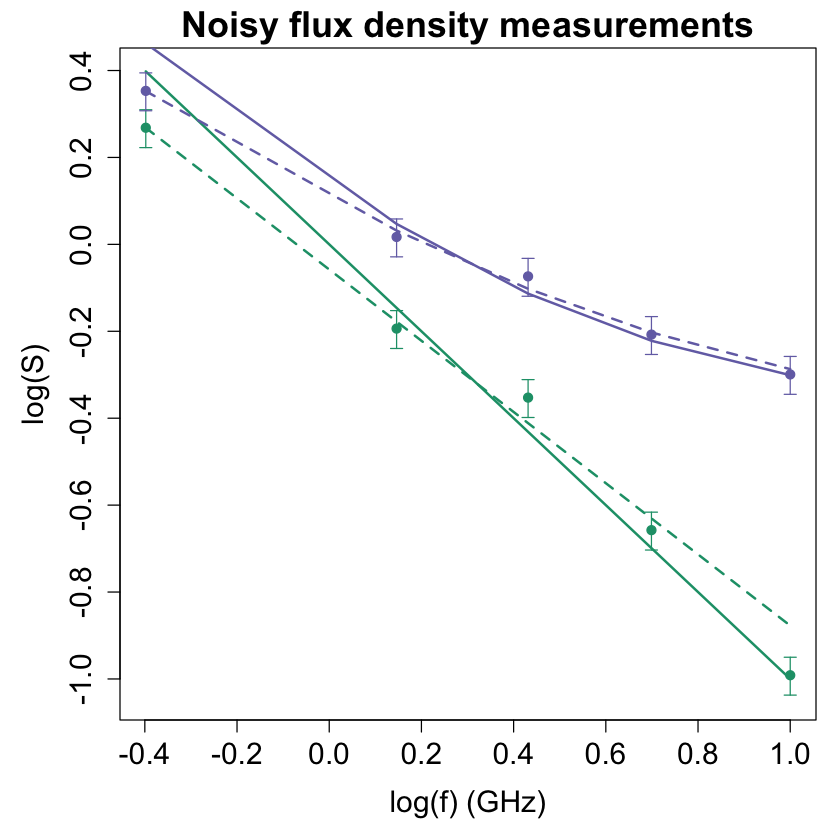

In [2]:
eps = 0.1 # 10% Gaussian noise
# True values & Limits for the Grids
K.true = 1; K.min = 0.1 ; K.max = 2
G.true = 1; G.min = 0.1 ; G.max = 2
B.true = 0.4; B.min = 0 ; B.max = 1

# DATA: 
frq = c(0.4,1.4,2.7,5,10)
S = c(1.855,0.640,0.444,0.22,0.102)

data0 <- data.frame(f=frq,S=S)
# we add an offset of 0.4 units (flattened spectrum)
data <- data.frame(f=frq,S=B.true + S)

## Non linear regression :
x = frq; y = S
#model
m<-nls(y~a*x^(-b),start=list(a=1,b=1))
summary(m)
coef(summary(m))
#get some estimation of goodness of fit
cor(y,predict(m))

y = B.true + S
#model
m2<-nls(y~a*x^(-b)+c,start=list(a=1,b=1,c=0))
summary(m2)
coef(summary(m2))
#get some estimation of goodness of fit
cor(y,predict(m2))

# ----------------------------------------------------------------
col = c("#1B9E77","#7570B3","#D95F02")

par(mfrow=c(1,1),mar=c(5, 5, 2, 1))#,oma = c(4, 4, 2, 0.2))
plot(log10(data0$f),log10(data0$S),"p",pch=19,col=col[1],
     ylim = range(c(log10((data0$S)*0.9),log10((data0$S+0.4)*1.1))),
     cex.axis=1.5,cex.lab=1.5,cex.main=1.8,
     xlab = "log(f) (GHz)",ylab = "log(S)",
     main="Noisy flux density measurements")
arrows(log10(data0$f), log10(data0$S*0.9), log10(data0$f), log10(data0$S*1.1), 
       col=col[1],length=0.05, angle=90, code=3)
# model fo f(S) = power law of slope -1
lines(log10(frq), log10(K.true*frq^(-G.true)),col=col[1],lwd=2)
lines(log10(frq),log10(predict(m)),col=col[1],lty=2,lwd=2)
# data with an offset error 0f 0.4 units
points(log10(data$f),log10(data$S),pch=19, col=col[2])
arrows(log10(data$f), log10((data$S)*0.9), log10(data$f), log10((data$S)*1.1), 
       col=col[2],length=0.05, angle=90, code=3)
lines(log10(frq), log10(B.true + K.true*frq^(-G.true)),col=col[2],lwd=2)
lines(log10(frq),log10(predict(m2)),col=col[2],lty=2,lwd=2)

# BAYESIAN APPROACH: 

## Model A:  

$f(x_i |\kappa,\gamma) = \frac{1}{\sqrt{2\pi}\epsilon\kappa f_{i}^{-\gamma}}
exp \left( -\frac{(S_i-\kappa f_{i}^{-\gamma})^2 }{2(\epsilon\kappa f_{i}^{-\gamma})^2} \right) $

- Prior: $p(\kappa,\gamma) \propto 1$

- Likelihood: 
	$ \mathcal{L}(\kappa,\gamma) = f( x |\kappa,\gamma) = \displaystyle\prod_{i=1}^{n} f(x_i |\kappa,\gamma)
	 $

- Joint posterior:
	$$ p(\kappa,\gamma | x) \propto  
	(\sqrt{2\pi}\epsilon\kappa)^{-n}\left( \prod_{i=1}^{n} f_i\right)^{\gamma} 
	exp \left( - \sum_{i=1}^{n} \frac{(S_i-\kappa f_{i}^{-\gamma})^2 }{2(\epsilon\kappa f_{i}^{-\gamma})^2}\right) 
	$$
	 
- Marginal posteriors : marginalize the nuisance params. out
    - $p(\kappa |  x) = \int p(\kappa,\gamma |  x) d\gamma$ 
    
	- $p(\gamma |  x) = \int p(\kappa,\gamma |  x) d\kappa$


In [6]:
# Define the functions to compute:

# LIKELIHOOD:
like.A <- function(x,G,K){
  # x is an 2D array; 1st col = freq, 2nd col = flux 
  mu <- K*x[,1]^(-G) 
  sig <- eps*abs(mu)
  likelihood <- prod(dnorm(x[,2],mu,sig))
  return(likelihood)
}


# JOINT POSTERIOR D.:
post.A <- function(x,G,K){
  # x is an N*2 array; 1st col = freq, 2nd col = flux
  #Assume non-informative priors for (G,K)
  post <- like.A(x,G,K) # unnormalize posterior 
  return(post)
}

n.grid = 101
G.grid <- seq(G.min, G.max, length.out = n.grid)
K.grid <- seq(K.min, K.max, length.out = n.grid)

grid <- expand.grid(G.grid,K.grid)
#plot(grid$Var1, grid$Var2,type = "p",pch=16)


dfA <- data.frame(G = grid$Var1, K = grid$Var2)

# (unnormalized) post. of (G,K) for both dataset:
dfA$post0 <- apply(dfA,1, function(params) post.A(data0,params[1],params[2]))
dfA$post <- apply(dfA,1, function(params) post.A(data,params[1],params[2]))

In [7]:
# Sampling from the joint posterior:
## First dataset:
sample.G <- sample(dfA$G, 100, replace = TRUE, prob = dfA$post0)
summary(sample.G)
sample.K <- sample(dfA$K, 100, replace = TRUE, prob = dfA$post0)
summary(sample.K)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7650  0.8600  0.8980  0.8894  0.9170  1.0120 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8030  0.8600  0.8980  0.8946  0.9217  1.0500 

In [8]:
## data 2 (with offset)
sampleA.G <- sample(dfA$G, 100, replace = TRUE, prob = dfA$post)
summary(sampleA.G)
sampleA.K <- sample(dfA$K, 100, replace = TRUE, prob = dfA$post)
summary(sampleA.K)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3660  0.4420  0.4610  0.4657  0.4990  0.5560 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.202   1.297   1.354   1.359   1.411   1.506 

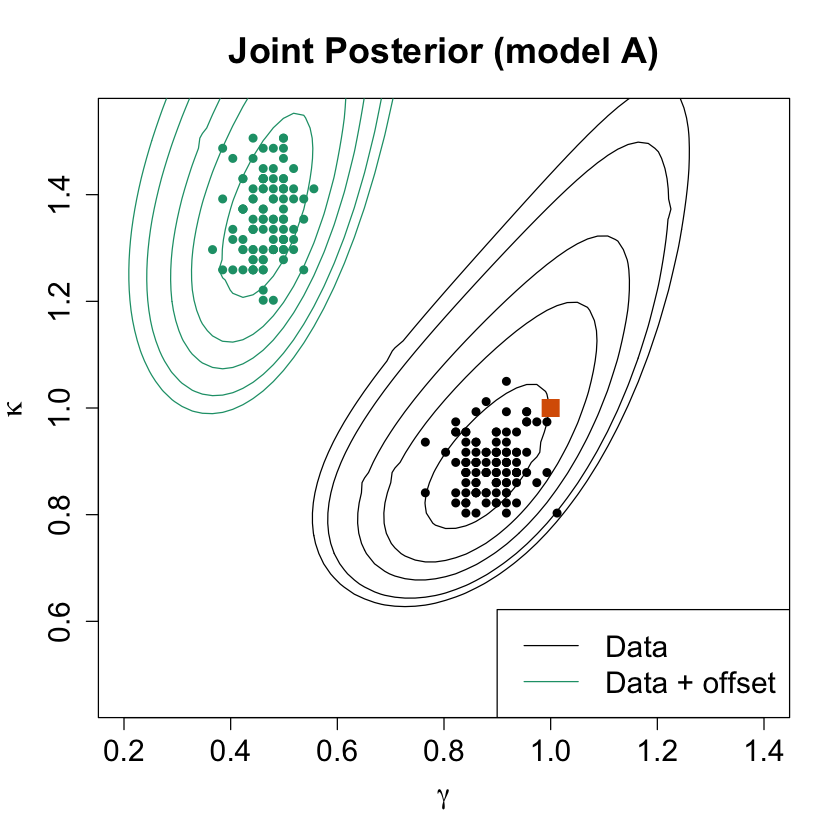

In [9]:
## some plots: 
par(mfrow=c(1,1))
## Joint post: we take log post for smoothing plots
contour(G.grid, K.grid, matrix(log10(dfA$post0), n.grid, n.grid), #6,
        levels = quantile(log10(dfA$post0),c(0.9,0.92,0.95,0.97,0.99)),
        drawlabels= FALSE,
        xlim = c(0.2,1.4),ylim = c(0.5,1.5),
        cex.axis=1.5,cex.lab=1.5,cex.main=1.8,
        asp = 1, xlab=expression(gamma),ylab=expression(kappa),
        main="Joint Posterior (model A)")
points(sample.G,sample.K,pch=16)
points(G.true,K.true,col=col[3],pch=15,cex=2)
#
contour(G.grid, K.grid, matrix(log10(dfA$post), n.grid, n.grid), #6,
        levels = quantile(log10(dfA$post),c(0.9,0.92,0.95,0.97,0.99)),
        drawlabels= FALSE, add = TRUE,col= col[1])
points(sampleA.G,sampleA.K,pch=16,col=col[1])
legend("bottomright", legend=c("Data", "Data + offset"),
       col=c("black", col[1]), lty=1, cex=1.5)


Warning message:
“Removed 3036 rows containing non-finite values (stat_contour).”

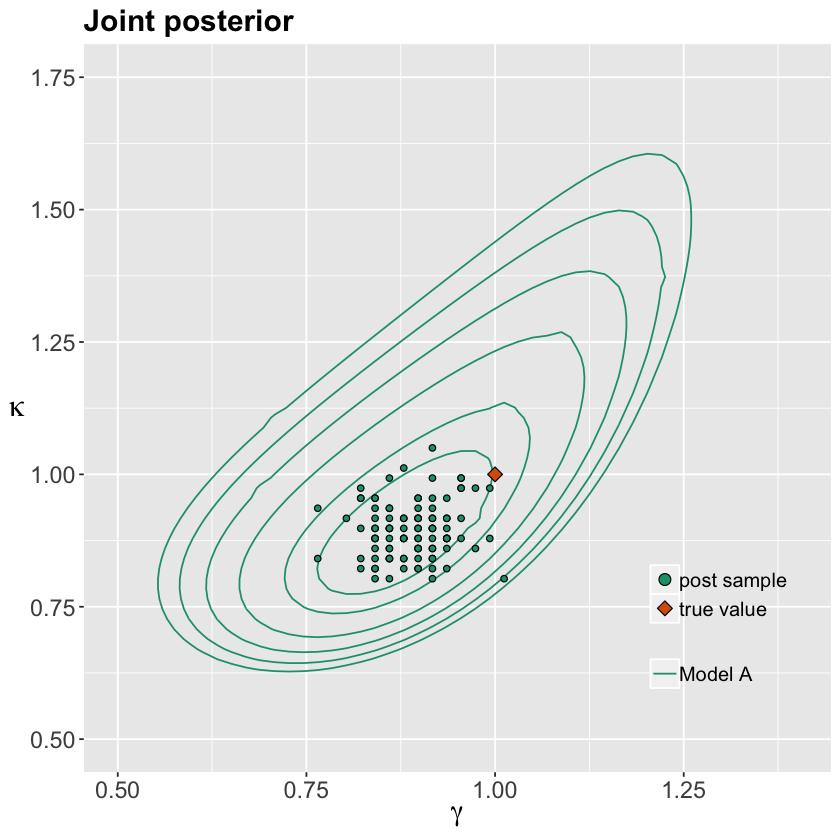

In [14]:
limG <- c(0.5,1.4)
limK <- c(0.5,1.75)

jointpost.modA <- ggplot() +
  stat_contour(data=dfA,aes(x=G,y=K,z=log10(post0),col='1'),
               breaks = quantile(log10(dfA$post0),c(0.9,0.92,0.94,0.96,0.98,0.99))) +
  geom_point(data=data.frame(G=sample.G,K=sample.K),aes(G,K,fill='1'),shape=21,size=1.5) +
  geom_point(data=data.frame(G=G.true,K=K.true),aes(G,K,fill='3'),shape=23,size=3) +
  coord_cartesian(xlim = limG,ylim = limK) +
  scale_color_manual(values=col[1], labels = c("Model A")) +
  scale_fill_manual(values=col[c(1,3)], labels = c("post sample","true value"),
                    guide=guide_legend(override.aes=list(shape=c(21,23)))) +
  labs(title='Joint posterior', x=expression(gamma),y = expression(kappa)) +
  #guides(fill = FALSE) + 
  theme(axis.text=element_text(size=14),
        axis.title.y  = element_text(size=18,angle=0,vjust = 0.5),
        axis.title.x = element_text(size = 18),
        plot.title=element_text(size=18,face="bold"),
        legend.background = element_blank(),
        legend.position = c(0.85, 0.2),
        legend.text= element_text(size = 12),
        legend.title = element_blank())

jointpost.modA

Warning message:
“Removed 3036 rows containing non-finite values (stat_contour).”Warning message:
“Removed 101 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”Warning message:
“Removed 101 rows containing missing values (geom_path).”

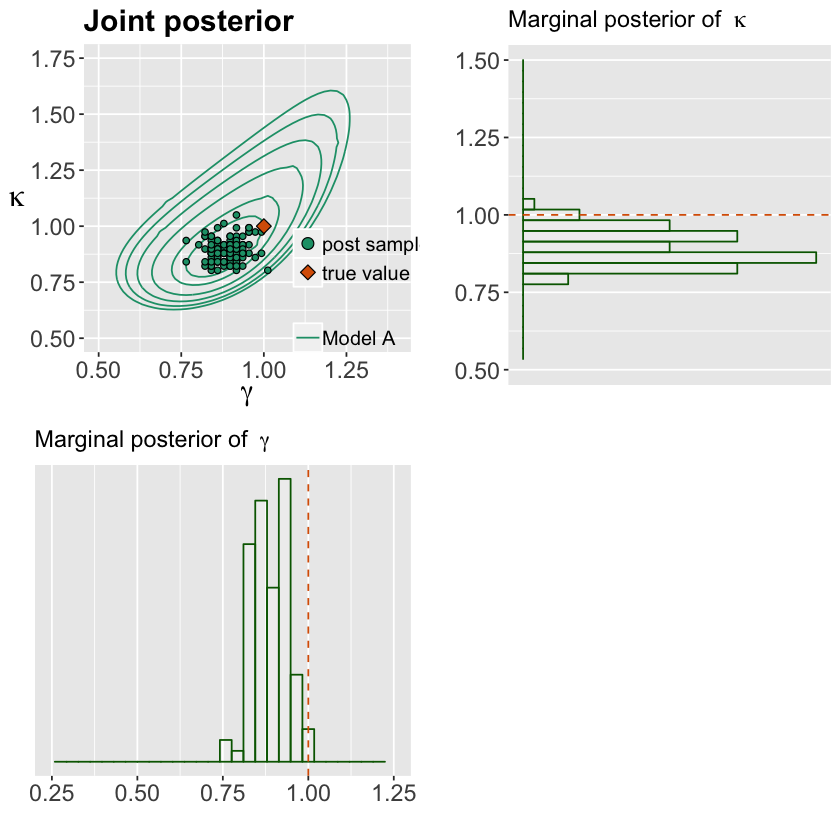

In [28]:
####
# Marginal posteriors (by means of Monte Carlo Integration)

## (i) Marg. post of Gamma 
dfAm.G <- data.frame(G = G.grid, mpost0 = 0,mpost = 0)

for(i in 1:n.grid){
  dfAm.G$mpost0[i] <- (K.max-K.min)/n.grid * sum(dfA[which(dfA$G == G.grid[i]),]$mpost0) 
  dfAm.G$mpost[i] <- (K.max-K.min)/n.grid * sum(dfA[which(dfA$G == G.grid[i]),]$mpost) 
}


margG.modA <- ggplot() +
  geom_histogram(data=data.frame(G = sample.G),aes(G,..ndensity..),# density, scaled to maximum of 1
                 bins=30,fill= 'white' ,col = 'darkgreen', alpha=0.2) +
  geom_line(data= dfAm.G,aes(G,mpost0/max(mpost0)),col=col[1],lwd=1) +  
  geom_vline(xintercept = G.true,col=col[3],lty='dashed') + 
  scale_x_continuous(limits = limG) +
  scale_y_continuous(breaks = NULL) +
  labs(title = expression(paste('Marginal posterior of  ',gamma)), x = '', y = '') +
  guides(color = FALSE) +
  theme(axis.text=element_text(size=14),
        plot.title = element_text(size=14),
        axis.title = element_text(size=14))

# margG.modA

## (ii) Marg. post of Kappa 
dfAm.K <- data.frame(K = K.grid, mpost0 = 0,mpost = 0)

for(i in 1:n.grid){
  dfAm.K$mpost0[i] <- (G.max-G.min)/n.grid * sum(dfA[which(dfA$K == K.grid[i]),]$mpost0) 
  dfAm.K$mpost[i] <- (G.max-G.min)/n.grid * sum(dfA[which(dfA$K == K.grid[i]),]$mpost) 
}

margK.modA <- ggplot() +
  geom_histogram(data=data.frame(K = sample.K),aes(K,..ndensity..),#density, scaled to maximum of 1
                 bins=30,fill= 'white' ,col = 'darkgreen', alpha=0.2) +
  geom_line(data= dfAm.K,aes(K,mpost0/max(mpost0)),col=col[1],lwd=1) +
  geom_vline(xintercept = K.true,col=col[3],lty='dashed') + 
  scale_x_continuous(limits = limK) + 
  scale_y_continuous(breaks = NULL) +
  coord_flip() +
  labs(title = expression(paste('Marginal posterior of  ',kappa)), x = '', y = '') +
  guides(color = FALSE) +
  theme(axis.text=element_text(size=14),
        plot.title = element_text(size=14),
        axis.title = element_text(size=14))

#margK.modA


# combine the plots
grid.arrange(jointpost.modA, margK.modA, margG.modA, nrow = 2)



## Model B:  

$f(xi |\kappa,\gamma,\beta) = \frac{1}{\sqrt{2\pi}\epsilon\kappa f_{i}^{-\gamma}}
exp \left( -\frac{(S_i-\beta-\kappa f_{i}^{-\gamma})^2 }{2(\epsilon\kappa f_{i}^{-\gamma})^2} \right) $

- Prior: $$p(\kappa,\gamma,\beta) \propto  
		\frac{1}{\sqrt{2\pi}\epsilon} exp\left(-\frac{(\beta-\mu_{\beta})^2}{2\epsilon^2}\right),
        $$
known $\mu_{\beta}$ and $\epsilon$


- Likelihood: 
	$$ L(\kappa,\gamma,\beta) = (\sqrt{2\pi}\epsilon\kappa)^{-n}\left( \displaystyle\prod_{i=1}^{n} f_i\right)^{\gamma}
		exp \left( 
		- \displaystyle\sum_{i=1}^{n} \frac{(S_i-\kappa f_{i}^{-\gamma}-\beta)^2 }{2(\epsilon\kappa f_{i}^{-\gamma})^2}
		 \right) $$


- Joint posterior:
	$$ p(\kappa,\gamma,\beta | D)  \propto
	(\sqrt{2\pi}\epsilon)^{-n-1}\kappa^{-n}\left( \displaystyle\prod_{i=1}^{n} f_i\right)^{\gamma}
		exp \underbrace{\left( -\frac{(\beta-\mu_{\beta})^2}{2\epsilon^2}
		- \sum_{i=1}^{n} \frac{(S_i-\kappa f_{i}^{-\gamma}-\beta)^2 }{2(\epsilon\kappa f_{i}^{-\gamma})^2}\right)}_{-A\beta^2+B\beta +C}
	$$
    
    $A = \frac{1}{2\epsilon} +\displaystyle \sum_{i=1}^n \frac{\kappa^{-2}f_i^{2\gamma}}{2\epsilon^2}; \quad
	B= \frac{\mu_{\beta}}{\epsilon^2} + \displaystyle\sum_{i=1}^n \frac{S_i-\kappa f_i^{-\gamma}}{\epsilon^2\kappa^{-2}f_i^{-2\gamma}}; \quad
	C= -\frac{\mu_{\beta}^2}{2\epsilon^2} - \displaystyle\sum_{i=1}^n \frac{(S_i-\kappa f_i^{-\gamma})^2}{\epsilon^2\kappa^{-2}f_i^{-2\gamma}}
	$
	 
     
- Marginal posteriors : 
    $$ p(\kappa,\gamma | D) = \displaystyle\int_{-\infty}^{\infty} p(\kappa,\gamma,\beta | D) d\beta  \propto
	(\sqrt{2\pi}\epsilon)^{-n-1}\kappa^{-n}\left( \prod_{i=1}^{n} f_i\right)^{\gamma}
	\sqrt{\frac{\pi}{A}}e^{\frac{B^2}{4A}+C}
	$$
    
    
 

In [19]:
# PRIOR:
# Assume non-informative priors for (G,K), as well as independence 
prior.B <- function(B){
  # Assume non-informative priors on (G,K)
  return(dnorm(B,0.4,eps))
}


# LIKELIHOOD:
like.B <- function(x,B,G,K){
  # x is an 2D array; 1st col = freq, 2nd col = flux 
  mu <- B + K*x[,1]^(-G) 
  sig <- eps*abs(K*x[,1]^(-G))
  likelihood <- prod(dnorm(x[,2],mu,sig))
  return(likelihood)
}


# JOINT POSTERIOR D.:
post.B <- function(x,B,G,K){
  # x is an N*2 array, 1st col = freq, 2nd col = flux
  #Assume non-informative priors for (G,K), and B~N(0.4,eps)
  post <- prior.B(B)*like.B(x,B,G,K) # unnormalize posterior
  return(post)
}

postB.mGK <- function(x,G,K){
  # x is an N*2 array, 1st col = freq, 2nd col = flux
  n = dim(x)[1]
  A <- 1/(2*eps^2)*(1 + sum((K*x[,1]^(-G))^(-2)))
  B <- 1/(eps^2)*(0.4 + sum((x[,2]-K*x[,1]^(-G))/(K*x[,1]^(-G))^2))
  C <- -1/(2*eps^2)*(0.4^2 + sum((x[,2]*K^(-1)*x[,1]^(G)-1)^2))
  # unnormalize posterior
  post <- (sqrt(2*3.141593)*eps)^(-n-1) * K^(-n) * prod(x[,1])^G * sqrt(3.141593/A)*exp(B^2/(4*A)+C)
  return(post)
}

B.grid <- seq(B.min, B.max, length.out = 21)

gridB <- expand.grid(B.grid,G.grid,K.grid)
#plot(gridB$Var1,gridB$Var2,pch=20)

dfB <- data.frame(B=gridB$Var1,G = gridB$Var2, K = gridB$Var3)
# (unnormalized) JOINT POSTERIOR (B,G,K):
dfB$post <- apply(dfB,1, function(params) post.B(data,params[1],params[2],params[3]))

# SAMPLING FROM THE POSTERIOR:
sampleB.B <- sample(dfB$B, 100, replace = TRUE, prob = dfB$post)
summary(sampleB.B)
                  
sampleB.G <- sample(dfB$G, 100, replace = TRUE, prob = dfB$post)
summary(sampleB.G)
                  
sampleB.K <- sample(dfB$K, 100, replace = TRUE, prob = dfB$post)
summary(sampleB.K)
              

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.200   0.300   0.350   0.342   0.350   0.400 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5370  0.7080  0.7650  0.7621  0.8030  1.0310 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.822   0.917   0.974   0.970   1.012   1.183 

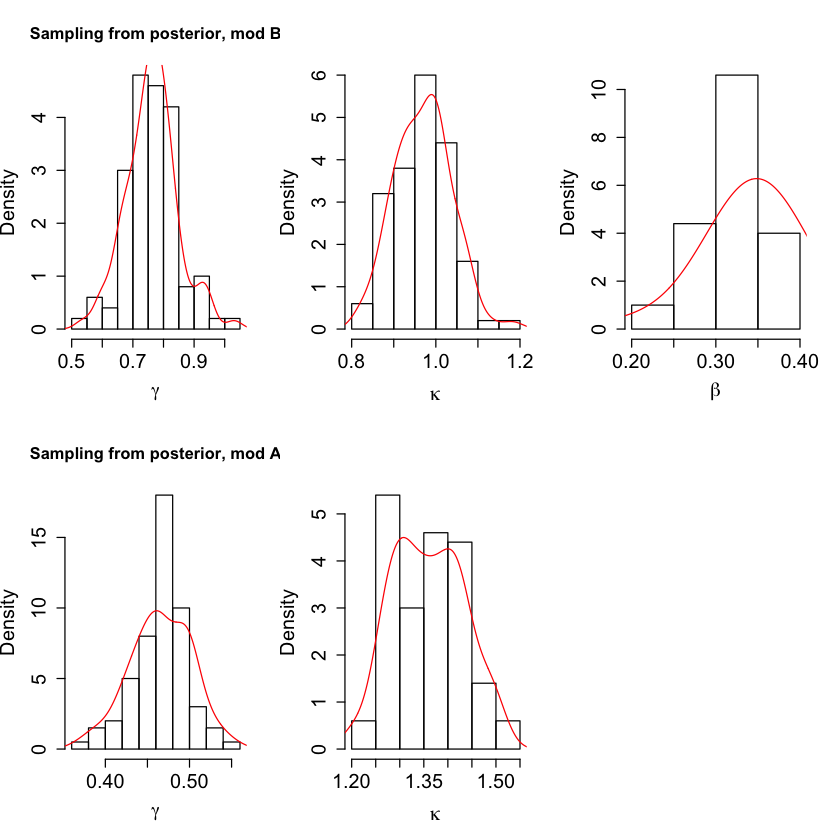

In [21]:
par(mfrow=c(2,3))
hist(sampleB.G,xlab=expression(gamma),freq=FALSE,
     cex.axis=1.5,cex.lab=1.5,cex.main=1.25,
     main="Sampling from posterior, mod B")
lines(density(sampleB.G),col='red')
hist(sampleB.K,xlab=expression(kappa),main="",
     freq=FALSE,cex.axis=1.5,cex.lab=1.5)
lines(density(sampleB.K),col='red')
hist(sampleB.B,xlab=expression(beta),main="",
     freq=FALSE,breaks=5,cex.axis=1.5,cex.lab=1.5)
lines(density(sampleB.B,bw=0.05),col='red')
##
hist(sampleA.G,xlab=expression(gamma),freq=FALSE,
     cex.axis=1.5,cex.lab=1.5,cex.main=1.25,
     main="Sampling from posterior, mod A")
lines(density(sampleA.G),col='red')
hist(sampleA.K,xlab=expression(kappa),main="",
     cex.axis=1.5,cex.lab=1.5,freq=FALSE)
lines(density(sampleA.K),col='red')

Warning message:
“Removed 6379 rows containing non-finite values (stat_contour).”Warning message:
“Removed 1438 rows containing non-finite values (stat_contour).”

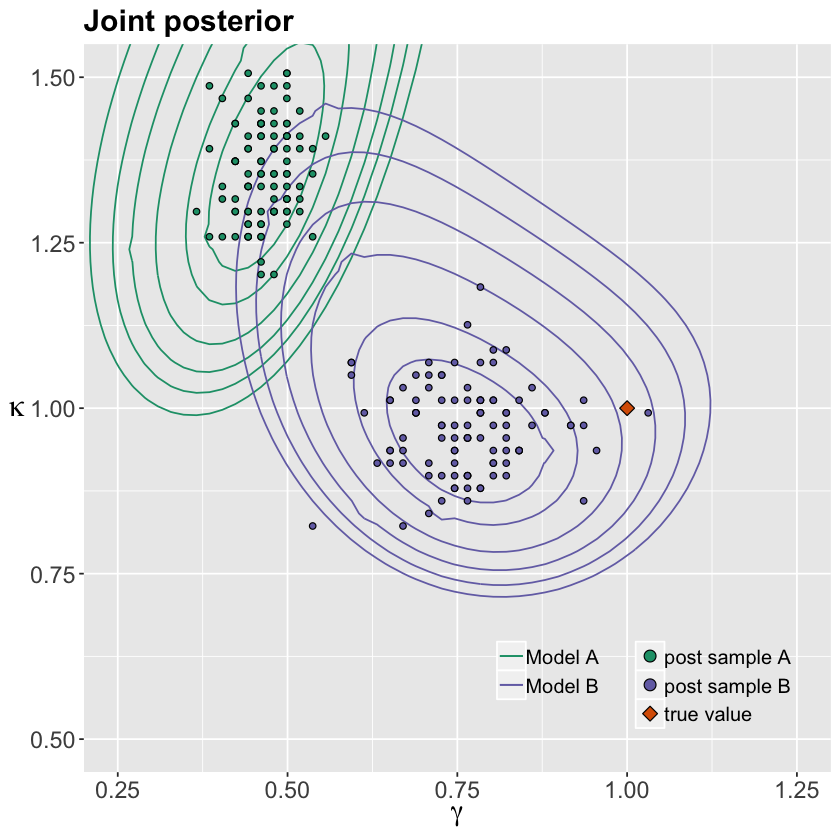

In [25]:
# MARGINAL POSTERIORS:

## (i) Marg. post of (Gamma,Kappa) : marginalize out Beta param. analytically 
dfmB.GK <- data.frame(G = grid$Var1, K=grid$Var2)
dfmB.GK$mpost <-  apply(dfmB.GK,1, function(params) postB.mGK(data,params[1],params[2]))


limG <- c(0.25,1.25)
limK <- c(0.5,1.5)

jointpost <- ggplot() +
  stat_contour(data=dfA,aes(x=G,y=K,z=log10(post),col='1'),
               breaks = quantile(log10(dfA$post),c(0.9,0.92,0.94,0.96,0.98,0.99))) +
  stat_contour(data=dfmB.GK,aes(x=G,y=K,z=log10(mpost),col='2'),
               breaks = quantile(log10(dfmB.GK$mpost),c(0.9,0.92,0.94,0.96,0.98,0.99))) +
  geom_point(data=data.frame(G=sampleA.G,K=sampleA.K),aes(G,K,fill='1'),shape=21,size=1.5) +
  geom_point(data=data.frame(G=sampleB.G,K=sampleB.K),aes(G,K,fill='2'),shape=21,size=1.5) +
   geom_point(data=data.frame(G=G.true,K=K.true),aes(G,K,fill='3'),shape=23,size=3) +
  coord_cartesian(xlim = limG,ylim = limK) +
  scale_color_manual(values=col[1:2], labels = c("Model A","Model B")) +
  scale_fill_manual(values=col, labels = c("post sample A","post sample B","true value"),
                    guide=guide_legend(override.aes=list(shape=c(21,21,23)))) +
  labs(title='Joint posterior', x=expression(gamma),y = expression(kappa)) +
  guides(color = guide_legend(order = 1)) + 
  #guides(fill = FALSE) + 
  theme(axis.text=element_text(size=14),
        axis.title.y  = element_text(size=18,angle=0,vjust = 0.5),
        axis.title.x = element_text(size = 18),
        plot.title=element_text(size=18,face="bold"),
        legend.box="horizontal",
        legend.background = element_blank(),
        legend.position = c(0.75, 0.12),
        legend.text= element_text(size = 12),
        legend.title = element_blank())


jointpost


Warning message:
“Removed 6379 rows containing non-finite values (stat_contour).”Warning message:
“Removed 1438 rows containing non-finite values (stat_contour).”Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”Warning message:
“Removed 101 rows containing missing values (geom_path).”Warning message:
“Removed 49 rows containing missing values (geom_path).”Warning message:
“Removed 101 rows containing missing values (geom_path).”Warning message:
“Removed 48 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

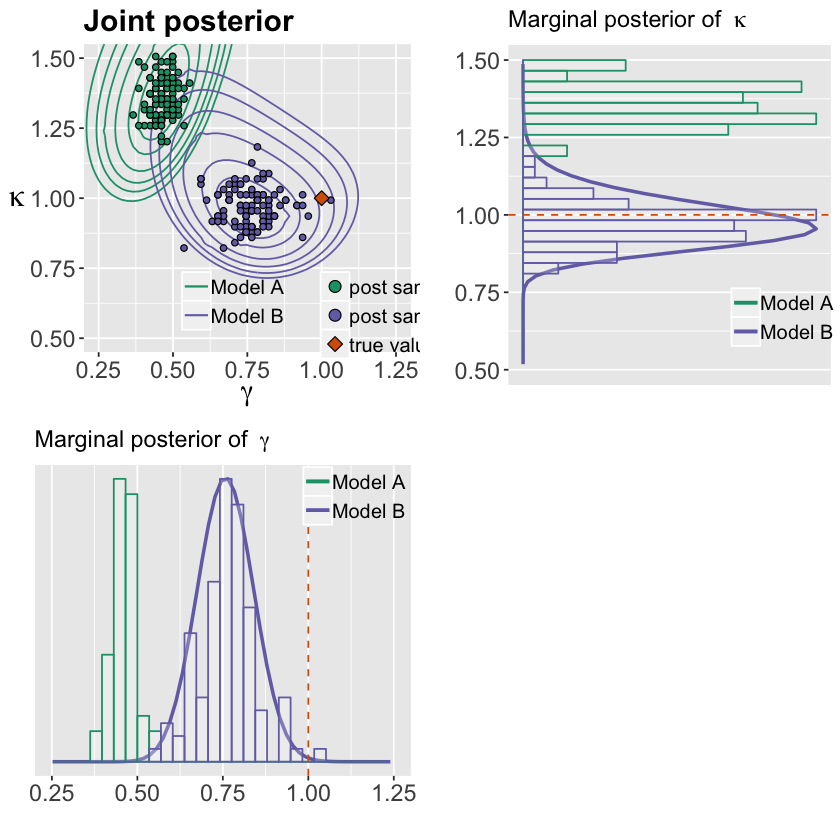

In [26]:
## (ii) Marg. of Gamma : marginalize out Kappa param. by Montecarlo Integration
dfBm.G <- data.frame(G = G.grid, mpost = 0)

for(i in 1:n.grid){
  dfBm.G$mpost[i] <- (K.max-K.min)/n.grid * sum(dfmB.GK[which(dfmB.GK$G == G.grid[i]),]$mpost) 
}

margG <- ggplot(mapping = aes(G,mpost/max(mpost))) +
  geom_line(data= dfAm.G,aes(col='1'),lwd=1) +
  geom_line(data= dfBm.G,aes(col='2'),lwd=1) +
  #density, scaled to maximum of 1
  geom_histogram(data=data.frame(G = sampleA.G),aes(G,..ndensity..),
                 bins=30,fill= 'white' ,col = col[1], alpha=0.2) +
  geom_histogram(data=data.frame(G = sampleB.G),aes(G,..ndensity..),
                 bins=30,fill= 'white' ,col = col[2], alpha=0.2) +
  geom_vline(xintercept = G.true,col=col[3],lty='dashed') + 
  scale_x_continuous(limits = limG) +
  scale_y_continuous(breaks = NULL) +
  scale_color_manual(values=col[1:2], labels = c("Model A","Model B")) +
  labs(title = expression(paste('Marginal posterior of  ',gamma)), x = '', y = '') +
  theme(axis.text=element_text(size=14),
        plot.title = element_text(size=14),
        axis.title = element_text(size=14),
        legend.background = element_blank(),
        legend.position = c(0.85, 0.9),
        legend.text= element_text(size = 12),
        legend.title = element_blank())


## (iii) Marg. of Kappa : marginalize out Gamma param.
dfBm.K <- data.frame(K = K.grid, mpost = 0)

for(i in 1:n.grid){
  dfBm.K$mpost[i] <- (G.max-G.min)/n.grid * sum(dfmB.GK[which(dfmB.GK$K == K.grid[i]),]$mpost) 
}


margK <- ggplot(mapping = aes(K,mpost/max(mpost))) +
  geom_line(data= dfAm.K,aes(col='1'),lwd=1) +
  geom_line(data= dfBm.K,aes(col='2'),lwd=1) +
  #density, scaled to maximum of 1
  geom_histogram(data=data.frame(K = sampleA.K),aes(K,..ndensity..),
                 bins=30,fill= 'white' ,col = col[1], alpha=0.2) +
  geom_histogram(data=data.frame(K = sampleB.K),aes(K,..ndensity..),
                 bins=30,fill= 'white' ,col = col[2], alpha=0.2) +
  geom_vline(xintercept = G.true,col=col[3],lty='dashed') + 
  scale_x_continuous(limits = limK) +
  scale_y_continuous(breaks = NULL) +
  coord_flip() +
  scale_color_manual(values=col[1:2], labels = c("Model A","Model B")) +
  labs(title = expression(paste('Marginal posterior of  ',kappa)), x = '', y = '') +
  theme(axis.text=element_text(size=14),
        plot.title = element_text(size=14),
        axis.title = element_text(size=14),
        legend.background = element_blank(),
        legend.position = c(0.85, 0.2),
        legend.text= element_text(size = 12),
        legend.title = element_blank())

  

# combine the plots
grid.arrange(jointpost, margK, margG, nrow = 2)



## BAYES FACTOR: comparsion between both models

In [37]:
# Montercalo integration approx.:

BF.A <- (K.max-K.min)/n.grid * sum(dfAm.K$mpost) 
BF.A

BF.B <- (K.max-K.min)/n.grid * sum(dfBm.K$mpost) 
BF.B

BF.A / BF.B     
          

[1] 0

[1] 54.01475

[1] 0

In [38]:
BF.A <- (G.max-G.min)/n.grid * sum(dfAm.G$mpost) 
BF.B <- (G.max-G.min)/n.grid * sum(dfBm.G$mpost) 

BF.A / BF.B 

[1] 0